# Week 8 Homework 7 (Due on Monday, March 30 at 11:59PM)

1. Divide the dataset randomly into 80% training set and 20% test set, and build a logistic classifier to identify `Iris-Setosa` using the petal width and petal length. 

2. Calculate test accuracy, precision, recall, f1-score.

3. Plot the ROC curve and calculate AUC.

4. (optional for undergraduates) Build a grid of points using `np.meshgrid` and use their probabilities to draw the decision boundary of the model.

In [214]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [215]:
# Load the iris data dataset
from sklearn import datasets
iris = datasets.load_iris()

In [216]:
from sklearn.datasets import load_iris
iris=load_iris()
for keys in iris.keys() :
    print(keys)

data
target
target_names
DESCR
feature_names
filename


In [217]:
# Explore the dataset
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [218]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [219]:
# Convert the data into a data frame
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [220]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [221]:
len(iris.data)

150

In [222]:
# Add the target class
# print(iris['target'])
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [223]:
def get_target_name(x):
    return iris['target_names'][x]

x = iris_df.loc[12, 'target']
name = get_target_name(x)
print(x, name)

0 setosa


In [224]:
iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [225]:
# Apply get_target_name() to all target values
iris_df['target_name'] = iris_df['target'].apply(get_target_name)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [226]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
140,6.7,3.1,5.6,2.4,2,virginica
143,6.8,3.2,5.9,2.3,2,virginica
14,5.8,4.0,1.2,0.2,0,setosa
133,6.3,2.8,5.1,1.5,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [227]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


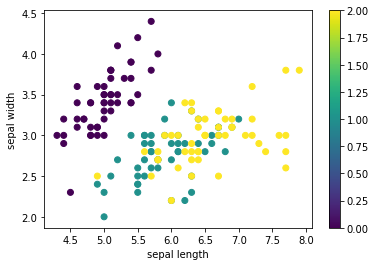

In [228]:
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['target'])
plt.colorbar()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [229]:
# Define a function is_setosa(target) that returns 1 if target is Setosa, and 0 otherwise
def is_setosa(target):
    if target == 'setosa':
        return 1
    else:
        return 0
    
target = iris_df.loc[50, 'target_name']
print(target, is_setosa(target))

versicolor 0


In [230]:
# Apply function is_setosa() to the data frame, creating a new 
# column "Is_Setosa"
iris_df['Is_Setosa'] = iris_df['target_name'].apply(is_setosa)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Is_Setosa
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


In [231]:
print(df_train.shape, df_test.shape)

(120, 6) (30, 6)


**1. Divide the dataset randomly into 80% training set and 20% test set, and build a logistic classifier to identify Iris-Setosa using the petal width and petal length.**

### train_test_split

In [232]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(iris_df, train_size=0.80, test_size = 0.20)
print(df_train.shape, df_test.shape)

(120, 7) (30, 7)


In [233]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Is_Setosa
130,7.4,2.8,6.1,1.9,2,virginica,0
88,5.6,3.0,4.1,1.3,1,versicolor,0
71,6.1,2.8,4.0,1.3,1,versicolor,0
148,6.2,3.4,5.4,2.3,2,virginica,0
112,6.8,3.0,5.5,2.1,2,virginica,0


In [234]:
# Display the amount of Setosa and non-Setosa cases in the training set
print(df_train['Is_Setosa'].value_counts())
print(df_test['Is_Setosa'].value_counts())

0    82
1    38
Name: Is_Setosa, dtype: int64
0    18
1    12
Name: Is_Setosa, dtype: int64


In [235]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(df_train.iloc[:, :4], df_train['Is_Setosa'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation

**2. Calculate test accuracy, precision, recall, f1-score.**

### Accuracy and Precision

In [236]:
# Prediction accuracy on test set
from sklearn.metrics import accuracy_score
prediction = model.predict(df_test.iloc[:, :4])
accuracy = accuracy_score(df_test['Is_Setosa'], prediction)
print(accuracy)

1.0


In [237]:
# Cross validation
from sklearn.model_selection import cross_val_score
input_cols = iris_df.columns[:4]
print(cross_val_score(model, df_train[input_cols], df_train['Is_Setosa'],
                      cv=3))

[1. 1. 1.]


[0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1]
[[18  0]
 [ 0 12]]


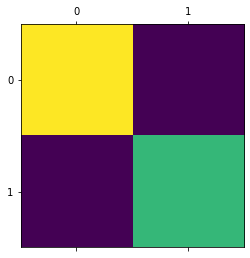

In [250]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
test_predictions = model.predict(df_test[input_cols])
print(test_predictions)
matrix = confusion_matrix(df_test['Is_Setosa'], test_predictions)
plt.matshow(matrix)
print(matrix)

### Precision, Recall and f1 Score

In [239]:
# Precision - Recall - f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(df_test['Is_Setosa'], test_predictions) # How much Setosa iris are correctly identified?
recall = recall_score(df_test['Is_Setosa'], test_predictions) # How much Setosa predictions are correct?
f1 = f1_score(df_test['Is_Setosa'], test_predictions)
print(precision, recall, f1)

1.0 1.0 1.0


## Varying The Threshold

**3. Plot the ROC curve and calculate AUC.**

In [240]:
probs = model.predict_proba(iris_df.iloc[:, :4])
print(probs)

[[2.08630461e-02 9.79136954e-01]
 [2.91751524e-02 9.70824848e-01]
 [1.81363619e-02 9.81863638e-01]
 [2.91227537e-02 9.70877246e-01]
 [1.83213674e-02 9.81678633e-01]
 [3.89019080e-02 9.61098092e-01]
 [1.99307696e-02 9.80069230e-01]
 [2.69740420e-02 9.73025958e-01]
 [2.54450740e-02 9.74554926e-01]
 [3.03518175e-02 9.69648183e-01]
 [2.49797858e-02 9.75020214e-01]
 [3.06235588e-02 9.69376441e-01]
 [2.54734596e-02 9.74526540e-01]
 [1.05918998e-02 9.89408100e-01]
 [1.20289420e-02 9.87971058e-01]
 [1.89138045e-02 9.81086196e-01]
 [1.64018832e-02 9.83598117e-01]
 [2.28714588e-02 9.77128541e-01]
 [4.40471384e-02 9.55952862e-01]
 [2.20105664e-02 9.77989434e-01]
 [4.92635513e-02 9.50736449e-01]
 [2.62616999e-02 9.73738300e-01]
 [6.36805113e-03 9.93631949e-01]
 [6.13557957e-02 9.38644204e-01]
 [5.78782760e-02 9.42121724e-01]
 [4.67121632e-02 9.53287837e-01]
 [4.00823480e-02 9.59917652e-01]
 [2.70808878e-02 9.72919112e-01]
 [2.37487956e-02 9.76251204e-01]
 [3.46751119e-02 9.65324888e-01]
 [3.939446

### ROC Curve

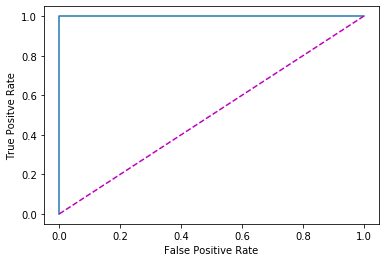

In [251]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(iris_df['Is_Setosa'], probs[:, 1])

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')

# worse case: tpr increases along with fpr
plt.plot([0, 1], [0, 1], 'm--')

### AUC Score

In [252]:
from sklearn.metrics import roc_auc_score
roc_auc_score(iris_df['Is_Setosa'], probs[:, 1])

1.0

In conclusion, The model's perfomance is perfect because it equals to 1.

- close to 1: the model's performance is very good
- close to 0.5: the model's performace is poor

## Model Visualization

**4. Build a grid of points using np.meshgrid and use their probabilities to draw the decision boundary of the model.**

In [253]:
# Train a new logistic regression model on petal length and petal width only
model2 = LogisticRegression(solver='lbfgs')
model2.fit(df_train.iloc[:, 2:4], df_train['Is_Setosa'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[10 10 10 10]
 [20 20 20 20]
 [30 30 30 30]
 [40 40 40 40]]


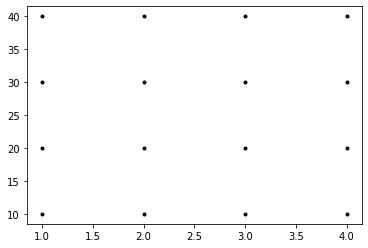

In [264]:
x_coordinates = [1, 2, 3, 4]
y_coordinates = [10, 20, 30, 40]
xx, yy = np.meshgrid(x_coordinates, y_coordinates)
print(xx)
print(yy)
plt.plot(xx, yy, 'k.')

In [255]:
# 1. Create a grid of points
x0, x1 = np.meshgrid(np.linspace(0, 7, 100),
                     np.linspace(0, 2.7, 100))
print(x0.shape, x1.shape)

(100, 100) (100, 100)


In [256]:
# 2. Obtain prediction probabilities
X_new = np.hstack([x0.reshape([-1, 1]), x1.reshape([-1, 1])])
y_new_prob = model2.predict_proba(X_new)

In [257]:
# 3. Find boundary points.
# Which points give 0.5 probability?
indices = np.where((y_new_prob[:, 1] > 0.49) & (y_new_prob[:, 1] < 0.51))
X_boundary = X_new[indices]

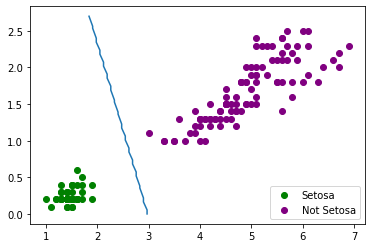

In [260]:
# 4. Plot the boundary
plt.plot(X_boundary[:, 0], X_boundary[:, 1])
idx_setosa = (iris_df['Is_Setosa'] == 1)
idx_not_setosa = (iris_df['Is_Setosa'] == 0)
plt.scatter(iris_df.loc[idx_setosa, 'petal length (cm)'],
            iris_df.loc[idx_setosa, 'petal width (cm)'],
            c='green',
            label='Setosa')
plt.scatter(iris_df.loc[idx_not_setosa, 'petal length (cm)'],
            iris_df.loc[idx_not_setosa, 'petal width (cm)'],
            c='purple',
            label='Not Setosa')
plt.legend()

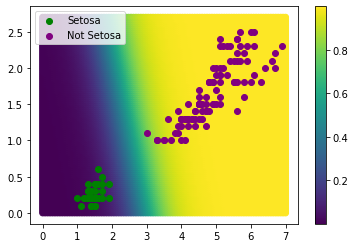

In [263]:
# 5. Plot probabilities
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new_prob[:, 0])
plt.colorbar()
plt.scatter(iris_df.loc[idx_setosa, 'petal length (cm)'],
            iris_df.loc[idx_setosa, 'petal width (cm)'],
            c='green',
            label='Setosa')
plt.scatter(iris_df.loc[idx_not_setosa, 'petal length (cm)'],
            iris_df.loc[idx_not_setosa, 'petal width (cm)'],
            c='purple',
            label='Not Setosa')
plt.legend()